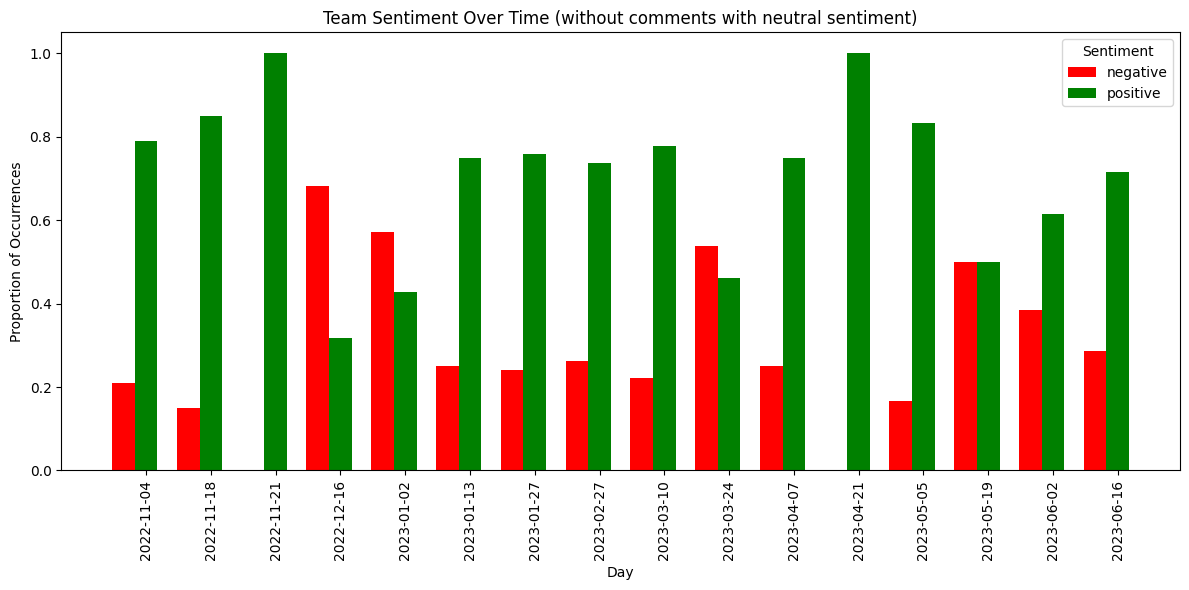

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_with_sentiment.csv")

df['day'] = pd.to_datetime(df['day'])

df_non_neutral = df[df['label'] != 'neutral']

sentiment_counts = df_non_neutral.groupby(['day', 'label']).size().unstack(fill_value=0)

total_occurrences = sentiment_counts.sum(axis=1)

normalized_sentiment_counts = sentiment_counts.div(total_occurrences, axis=0)

colors = {'negative': 'red', 'positive': 'green'}

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(normalized_sentiment_counts.index))

for i, label in enumerate(normalized_sentiment_counts.columns):
    plt.bar(index + i * bar_width, normalized_sentiment_counts[label], bar_width, color=colors[label], label=label)

plt.title('Team Sentiment Over Time (without comments with neutral sentiment)')
plt.xlabel('Day')
plt.ylabel('Proportion of Occurrences')
plt.xticks(index + bar_width, normalized_sentiment_counts.index.strftime('%Y-%m-%d'), rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
